

# Численная модель
Реализовать численную модель уравнений ошибок одноканальной БИНС, посмотреть как она работает для разных ошибок акселерометров, ДУС, ошибок начальных условий. Сопоставьте с тем, что было на лекции.


# Фильтр Калмана

Фильтр Калмана можно начинать моделировать на этой же системе. В качестве замеров можно взять ошибку положения, либо ошибку скорости, либо то и другое одновременно. Отладка фильтра примерно такая: задаются постоянные инструментальные ошибки, повороты по углу D и настройками фильтра добиваются приемлемой сходимости оценок ошибок. Более предметно об этом можно говорить когда появится модель.   

# Фильтр Калмана (Линейные системы)
Задача коррекции БИНС ставится как задача
оценивания вектора состояния $х$ линейной динамической системы по измерениям $z$.


Модель системы (процесса):
$$\dot x = A \cdot x + q,$$

Модель наблюдений (измерений):
$$z = H \cdot x + \omega,$$


q, w – векторные случайные процессы типа белого шума с
нулевым средним значением и заданными матрицами интенсивностей.

Метод Эйлера для численного дифференцирования:
$$x_{k} = Ax_{k-1} + q_{k}\\$$
$$   z_{k} = Hx_{k} + \omega_{k}$$

Требуется получить оценку вектора состояния системы $\hat{x}_k$, зная аналогичную оценку на предыдущем шаге ($\hat{x}_{k-1}$) и  вектор измерений $z_k$.

## Прогноз

Прогноз (экстраполяция) вектора состояния с помощью модели процесса:
$$\overline{x}_k = A_k \cdot \hat{x}_{k-1}$$

Прогноз матрицы ковариации ошибок:
$$\overline{P}_k = A_k\cdot \hat{P}_{k-1}\cdot A_k^T + Q_k$$


## Коррекция

Вычисление коэффициента усиления Калмана:
$$K_k = \overline{P}_k \cdot H_{k}^T \cdot \left(H_k\cdot \overline{P}_k\cdot H_k^T + R_k\right)^{-1}$$

Оценка матрицы ковариации ошибки:
$$\hat{P}_k = \left(E - K_k\cdot H_k\right)\cdot \overline{P}_k$$

Оценка вектора состояния:
$$\hat{x}_k = \overline{x}_k + K_k\cdot\left(z_k - H_k\cdot\overline{x}_k\right)$$

## Решение системы


Точное решение системы ДУ второго порядка имеет вид
\begin{equation}
   x = C_{1} e^t \begin{pmatrix} x_{base1} \\ x_{base2} \end{pmatrix} + C_{2} e^{-t} \begin{pmatrix} x_{base3} \\ x_{base3} \end{pmatrix} +  C_{3}  \begin{pmatrix} x_{special1} \\ x_{special2} \end{pmatrix}
\end{equation}

## Уравнение ошибок одноканальной БИНС

В терминах трёхгранников p (материлизованнный осями чувсвительности) и x (опорный):
$$ \Delta x = \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix}$$

$$\downarrow$$

$$ \Delta \dot x = \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix}$$,

где 

$\Delta \lambda$ - ошибка измерения долготы, 


$\Delta \upsilon_{y_2} $ - ошибка измерения скорости вдоль $y_2$ (близко к $x_2$ из-за малости угла $\gamma$), 


$\Delta \alpha$ - динамическая ошибка вертикали.



$$ A = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix}$$



$$ q = \begin{pmatrix} 0  \\ \Delta f_{p_2} \cos D - \Delta f_{p_1} \sin D \\ -\nu_{p_3} \end{pmatrix}$$

$$\downarrow$$


$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} + \begin{pmatrix} 0  \\ \Delta f_{p_2} \cos D - \Delta f_{p_1} \sin D \\ -\nu_{p_3} \end{pmatrix}$$,

$$\downarrow$$


$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\0 \\ \nu_{p_3} \end{pmatrix} +   \begin{pmatrix} 0  \\ \Delta f_{p_2} \cos D \\ 0 \end{pmatrix} - \begin{pmatrix} 0  \\ \Delta f_{p_1} \sin D \\ 0 \end{pmatrix}$$,


Суперпозиция - каждый вощмущающий фактор можно исслеовать независимо от других, то есть рассматривать парциальные вклады каждой из ошибок. 


## Уравнение ошибок одноканальной БИНС
### Смещение нуля акселерометра $\Delta f_z = 10^{-3} \frac{m}{c^2}$
$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ \Delta f_z \\ 0 \end{pmatrix}$$
### Начальная ошибка вертикали $\alpha = 20''$
$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ \Delta f_z \\ 0 \end{pmatrix}$$
### Ошибка дрейфа $\nu_{z_3} = 0.001 \frac{\circ}{hour}$
$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ 0 \\ \nu_{z_3} \end{pmatrix}$$
### Ошибка скорости $\upsilon_{y_2}  = 1 \frac{m}{c^2}$
$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ 0 \\ \nu_{z_3} \end{pmatrix}$$


## Уравнение ошибок одноканальной БИНС
### Смещение нуля акселерометра $\Delta f_z = 10^{-3} \frac{m}{c^2}$
$$ \begin{pmatrix} \frac{\Delta \dot  r}{a} \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \frac{\Delta r}{a} \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ \Delta f_z \\ 0 \end{pmatrix}$$,

$$\Delta r = a \Delta \lambda$$

$$\dot x = A \cdot x + q,$$
$$z = H \cdot x + \omega$$

$$\downarrow$$
$$x_k = A_{k-1}x_{k-1} + q_k,$$
$$z_k = H_{k}x_{k} + w_k,$$



$$x_k = (E + \Delta t A(t_{initial}))x_{initial}$$
$$x_{initial} = x(t_{initial})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Инициализация
tau = 0.01
T = 3 
a = 6378136
g = -9.81
A = np.array([[0, 1, 0],[0, 0, g], [0, 1/a, 0]])
print('Матрица динамики системы')
print(f'A = {A}\n')


H = np.array([1, 0, 0])
print('Матрица измерения системы')
print(f'H = {H}\n')

Q = np.array([[0, 0, 0],[0, 0.001, 0], [0, 0, 0.00001]])
print('Матрица ковариации ошибок модели')
print(f'Q = {Q}\n')


R = 0.0001
print('Матрица ковариации ошибок измерений')
print(f'R = {R}\n')

I = np.eye(3)
P = I
print('Матрица ковариации ошибок оценки состояния')
print(f'P = {P}\n')

x = np.array([0, 0, 0])
x_estimate = x
l = int(T / tau)
z = x[0]
print('Вектор состояния модели')
print(f'x = {x}\n')

print('Вектор оценки состояния модели')
print(f'x_estimate = {x_estimate}\n')

print('Вектор измерения')
print(f'z = {z}\n')

w = np.random.normal(0, 1, l)
print('Шум модели')
#print(f'w = {w}\n')

q = tau*np.array([np.random.normal(0, 3**0.5, l), np.random.normal(0, 3**0.5, l), np.random.normal(0, 3**0.5, l)])
print('Смещение нуля акселлерометра')
#print(f'q = {q}\n')


x_plot1 = np.zeros((l, 3))
x_plot2 = np.zeros((l, 3))
#print(f'x_plot2 = {x_plot2}\n')
z_plot = np.zeros(l)
#print(f'z_plot = {z_plot}\n')

E3x3 = np.eye(3) 


Матрица динамики системы
A = [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.81000000e+00]
 [ 0.00000000e+00  1.56785619e-07  0.00000000e+00]]

Матрица измерения системы
H = [1 0 0]

Матрица ковариации ошибок модели
Q = [[0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-03 0.e+00]
 [0.e+00 0.e+00 1.e-05]]

Матрица ковариации ошибок измерений
R = 0.0001

Матрица ковариации ошибок оценки состояния
P = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Вектор состояния модели
x = [0 0 0]

Вектор оценки состояния модели
x_estimate = [0 0 0]

Вектор измерения
z = 0

Шум модели
Смещение нуля акселлерометра


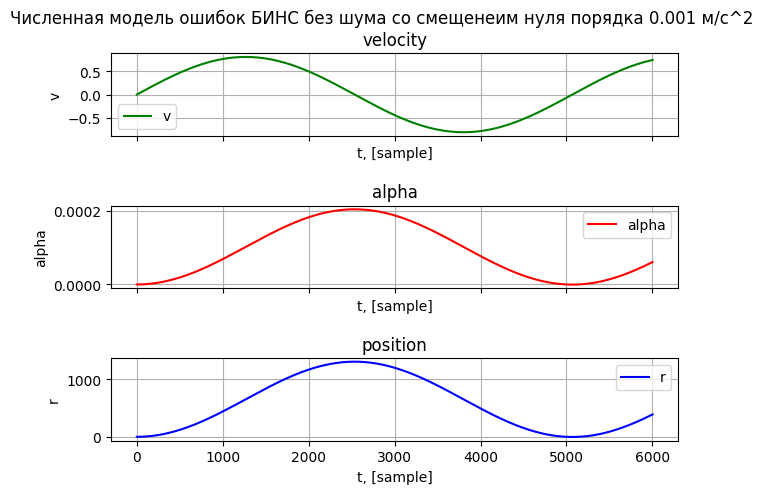

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import normalvariate

with np.errstate(divide='ignore'):
    np.float64(1.0) / 0.0

class BINS:
    def __init__(self, sigma_meas_r, sigma_meas_u, sigma_meas_a, sigma_f_z, q, dt):
        self.time = 0.0
        self.time_step = dt        
        self.delta_position = 0.0
        self.delta_upsilon = 0.0
        self.delta_alpha = 0.0
        self.q = q
        self.sigma_f_z = sigma_f_z
        self.measurement_r = None
        self.measurement_u = None
        self.measurement_a = None

        # шум измерений
        self.sigma_meas_r = sigma_meas_r
        self.sigma_meas_u = sigma_meas_u
        self.sigma_meas_a = sigma_meas_a

    def measure_r(self):
        if self.measurement_r == None:
            self.measurement_r = self.delta_position + normalvariate(0, self.sigma_meas_r)                   
        return self.measurement_r
    
    def measure_u(self):
        if self.measurement_u == None:
            self.measurement_u = self.delta_upsilon + normalvariate(0, self.sigma_meas_u)                   
        return self.measurement_u
    
    def measure_a(self):
        if self.measurement_r == None:
            self.measurement_a = self.delta_alpha + normalvariate(0, self.sigma_meas_a)                   
        return self.measurement_a

    def step(self):
        self.time += self.time_step
        q = normalvariate(0, self.q)
        self.delta_alpha = self.delta_upsilon / a
        self.delta_upsilon = -self.delta_alpha / g - self.sigma_f_z
        self.delta_position = self.delta_upsilon
       
        return self.delta_position, self.delta_upsilon, self.delta_alpha
    
    def set_position(self, r, u, al):
        self.delta_alpha = al
        self.delta_upsilon = u
        self.delta_position = r
    
    
    def step_number_dot(self, r, u, al, Ak_1):
        Et = np.array([[ self.time_step, 0, 0],[0,  self.time_step, 0], [0, 0,  self.time_step]])
        A_k = E3x3 + Et.dot(Ak_1)
        
        self.time += self.time_step
        
        lst = [self.delta_position, self.delta_upsilon, self.delta_alpha]
        vctrk_1 = np.array(lst)
        
        vctrk = A_k.dot(vctrk_1) + np.array([0,  self.sigma_f_z, 0])
        self.set_position(vctrk[0], vctrk[1], vctrk[2])
        return vctrk, Ak

    

       
#Инициализация
world = BINS(0, 0, 0, 0.001, q, 1)
episode_len = 6000
data = np.zeros((5, episode_len))
t_ini = 0
x_ini_r, x_ini_u, x_ini_a = world.step()
x_r, x_u, x_a = x_ini_r, x_ini_u, x_ini_a 
Ak = A
for i in range(episode_len):
    x, Ak = world.step_number_dot(world.delta_position, world.delta_upsilon,  world.delta_alpha, Ak)
    
    data[:, i] = np.array([world.time, world.delta_position, world.delta_upsilon,  world.delta_alpha, world.delta_alpha])
        

# plot
#fig1 = plt.figure(figsize=(16,8*8))
fig1, (ax2, ax3, ax4) = plt.subplots(3, sharex=True)
fig1.suptitle('Численная модель ошибок БИНС без шума со смещенеим нуля порядка 0.001 м/с^2 ')
fig1.tight_layout(h_pad = 4)
#ax1 = fig1.add_subplot(1,1,1)
#ax2 = fig1.add_subplot(2,1,2)
#ax3 = fig1.add_subplot(3,1,3)
#ax4 = fig1.add_subplot(4,1,4)


# v
ax2.set_title("velocity")
ax2.plot(data[0, :], data[2, :], 'g', label = r'v')
#ax2.plot(data[0, :], data[5, :], 'g', label = 'v_est')

ax2.set_ylabel(r'v')
ax2.set_xlabel(r't, [sample]')
ax2.grid(True)
ax2.legend()

# alpha
ax3.set_title("alpha")
ax3.plot(data[0, :], data[3, :], 'r', label = r'alpha')
#ax2.plot(data[0, :], data[5, :], 'g', label = 'v_est')

ax3.set_ylabel(r'alpha')
ax3.set_xlabel(r't, [sample]')
ax3.grid(True)
ax3.legend()

# r
ax4.set_title("position")
ax4.plot(data[0, :], data[1, :], 'b', label = 'r')

#ax1.plot(data[0, :], data[4, :]-data[1, :], 'g', label = 'pos_est')

ax4.set_ylabel(r'r')
ax4.set_xlabel(r't, [sample]')
ax4.grid(True)
ax4.legend()

#print(max( data[2, :]))


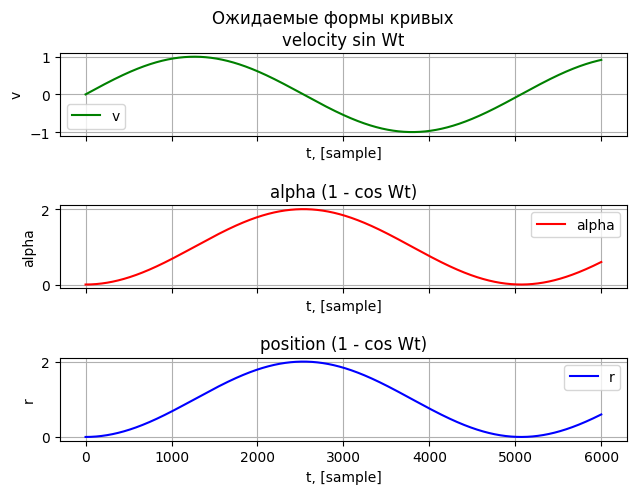

In [9]:
import math

episode_len = 6000
data1 = np.zeros((3, episode_len))
w = math.sqrt(-g/a)

for i in range(episode_len):
    
    data1[:, i] = np.array([i, math.sin(w*i), 1 - math.cos(w*i)])
        



# plot
#fig1 = plt.figure(figsize=(16,8*8))
fig1, (ax2, ax3, ax4) = plt.subplots(3, sharex=True)
fig1.suptitle('Ожидаемые формы кривых')
fig1.tight_layout(h_pad = 4)



# v
ax2.set_title("velocity sin Wt")
ax2.plot(data1[0, :], data1[1, :], 'g', label = r'v')

ax2.set_ylabel(r'v')
ax2.set_xlabel(r't, [sample]')
ax2.grid(True)
ax2.legend()

# alpha
ax3.set_title("alpha (1 - cos Wt)")
ax3.plot(data1[0, :], data1[2, :], 'r', label = r'alpha')


ax3.set_ylabel(r'alpha')
ax3.set_xlabel(r't, [sample]')
ax3.grid(True)
ax3.legend()

# r
ax4.set_title("position (1 - cos Wt)")
ax4.plot(data1[0, :], data1[2, :], 'b', label = 'r')



ax4.set_ylabel(r'r')
ax4.set_xlabel(r't, [sample]')
ax4.grid(True)
ax4.legend()

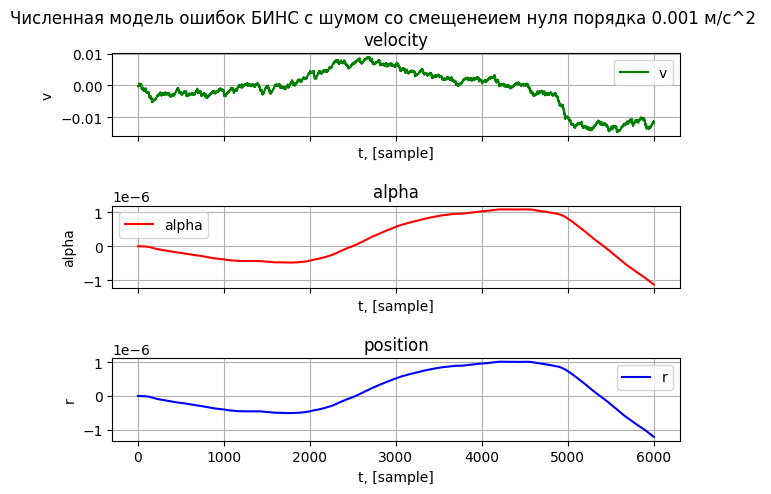

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from random import normalvariate

with np.errstate(divide='ignore'):
    np.float64(1.0) / 0.0
    

class BINS_UPDATE:
    def __init__(self, sigma_meas_r, sigma_meas_u, sigma_meas_a, sigma_f_z, q, dt):
        self.time = 0.0
        self.time_step = dt        
        self.delta_position = 0.0
        self.delta_upsilon = 0.0
        self.delta_alpha = 0.0
        self.q = q
        self.sigma_f_z = sigma_f_z
        self.measurement_r = None
        self.measurement_u = None
        self.measurement_a = None

        # шум измерений
        self.sigma_meas_r = sigma_meas_r
        self.sigma_meas_u = sigma_meas_u
        self.sigma_meas_a = sigma_meas_a

    def measure_r(self):
        if self.measurement_r == None:
            self.measurement_r = self.delta_position + normalvariate(0, self.sigma_meas_r)                   
        return self.measurement_r
    
    def measure_u(self):
        if self.measurement_u == None:
            self.measurement_u = self.delta_upsilon + normalvariate(0, self.sigma_meas_u)                   
        return self.measurement_u
    
    def measure_a(self):
        if self.measurement_r == None:
            self.measurement_a = self.delta_alpha + normalvariate(0, self.sigma_meas_a)                   
        return self.measurement_a

    def step(self):
        self.time += self.time_step
        self.delta_alpha = self.delta_upsilon / a
        self.delta_upsilon = -self.delta_alpha / g - self.sigma_f_z
        self.delta_position = self.delta_upsilon / a
       
        return self.delta_position, self.delta_upsilon, self.delta_alpha
    
    def set_position(self, r, u, al):
        self.delta_alpha = al
        self.delta_upsilon = u
        self.delta_position = r
    
    
    def step_number_dot(self, r, u, al, Ak_1, sr, su, sa):
        Et = np.array([[ self.time_step, 0, 0],[0,  self.time_step, 0], [0, 0,  self.time_step]])
        A_k = E3x3 + Et.dot(Ak_1)
        
        self.time += self.time_step
        
        lst = [self.delta_position, self.delta_upsilon, self.delta_alpha]
        vctrk_1 = np.array(lst)
        
        lst_sh = [sr, su, sa]
        vctrk_q = np.array(lst_sh)
        
        vctrk = A_k.dot(vctrk_1) + vctrk_q +  + np.array([0,  self.sigma_f_z, 0])
        self.set_position(vctrk[0], vctrk[1], vctrk[2])
        return vctrk, Ak

    

       
#Инициализация
x_plot1 = np.zeros((episode_len, 3))
x_plot2 = np.zeros((episode_len, 3))
z_plot = np.zeros(episode_len)
W = np.array([np.random.normal(0, 3**0.5, episode_len), np.random.normal(0, 3**0.5, episode_len), np.random.normal(0, 3**0.5, episode_len)])
q_step = np.array([np.random.normal(0, 1, episode_len)])
world = BINS_UPDATE(0.01, 0.01, 0.01, 0.0001, q_step, 1)
episode_len = 6000
data = np.zeros((5, episode_len))
t_ini = 0
x_ini_r, x_ini_u, x_ini_a = world.step()
x_r, x_u, x_a = x_ini_r, x_ini_u, x_ini_a 
Ak = A
q_shum_r = np.random.normal(0, 1, episode_len)
q_shum_u = np.random.normal(0, 1, episode_len)
q_shum_a = np.random.normal(0, 1, episode_len)
x_est = np.array([0,0,0])
for i in range(episode_len):
    x_step[0] = world.delta_position
    x_step, Ak = world.step_number_dot(x_step[0], world.delta_upsilon,  world.delta_alpha, Ak, x_r*q_shum_r[i]**2, x_u*q_shum_u[i]**2, x_a*q_shum_a[i]**2)
    
    data[:, i] = np.array([world.time, world.delta_position, world.delta_upsilon,  world.delta_alpha, world.delta_alpha])
    
    x_plot1[i, :] = x_step[0]
    x_plot2[i, :] = x
    z_plot[i] = x[0]

    x = np.dot(Ak, x_step) #+ world.q[i]
    z = np.dot(H, x) + W[:, i]
    
     
    x_predict = np.dot(Ak, x_step)
    P_predict = np.dot(Ak, np.dot(P, Ak.T)) + Q
    
    K = np.dot(P_predict, H.T) / (np.dot(H, np.dot(P_predict, H.T)) + R)
    x_step = x_predict + np.dot(K, z - np.dot(H, x_predict))
    P = np.dot(I - np.dot(K, H), P_predict)
        

# plot
#fig1 = plt.figure(figsize=(16,8*8))
fig1, (ax2, ax3, ax4) = plt.subplots(3, sharex=True)
fig1.suptitle('Численная модель ошибок БИНС с шумом со смещенеием нуля порядка 0.001 м/с^2 ')
fig1.tight_layout(h_pad = 4)
#ax1 = fig1.add_subplot(1,1,1)
#ax2 = fig1.add_subplot(2,1,2)
#ax3 = fig1.add_subplot(3,1,3)
#ax4 = fig1.add_subplot(4,1,4)


# v
ax2.set_title("velocity")
ax2.plot(data[0, :], data[2, :], 'g', label = r'v')
#ax2.plot(data[0, :], data[5, :], 'g', label = 'v_est')

ax2.set_ylabel(r'v')
ax2.set_xlabel(r't, [sample]')
ax2.grid(True)
ax2.legend()

# alpha
ax3.set_title("alpha")
ax3.plot(data[0, :], data[3, :], 'r', label = r'alpha')
#ax2.plot(data[0, :], data[5, :], 'g', label = 'v_est')

ax3.set_ylabel(r'alpha')
ax3.set_xlabel(r't, [sample]')
ax3.grid(True)
ax3.legend()

# r
ax4.set_title("position")
ax4.plot(data[0, :], data[1, :], 'b', label = 'r')

#ax1.plot(data[0, :], data[4, :]-data[1, :], 'g', label = 'pos_est')

ax4.set_ylabel(r'r')
ax4.set_xlabel(r't, [sample]')
ax4.grid(True)
ax4.legend()





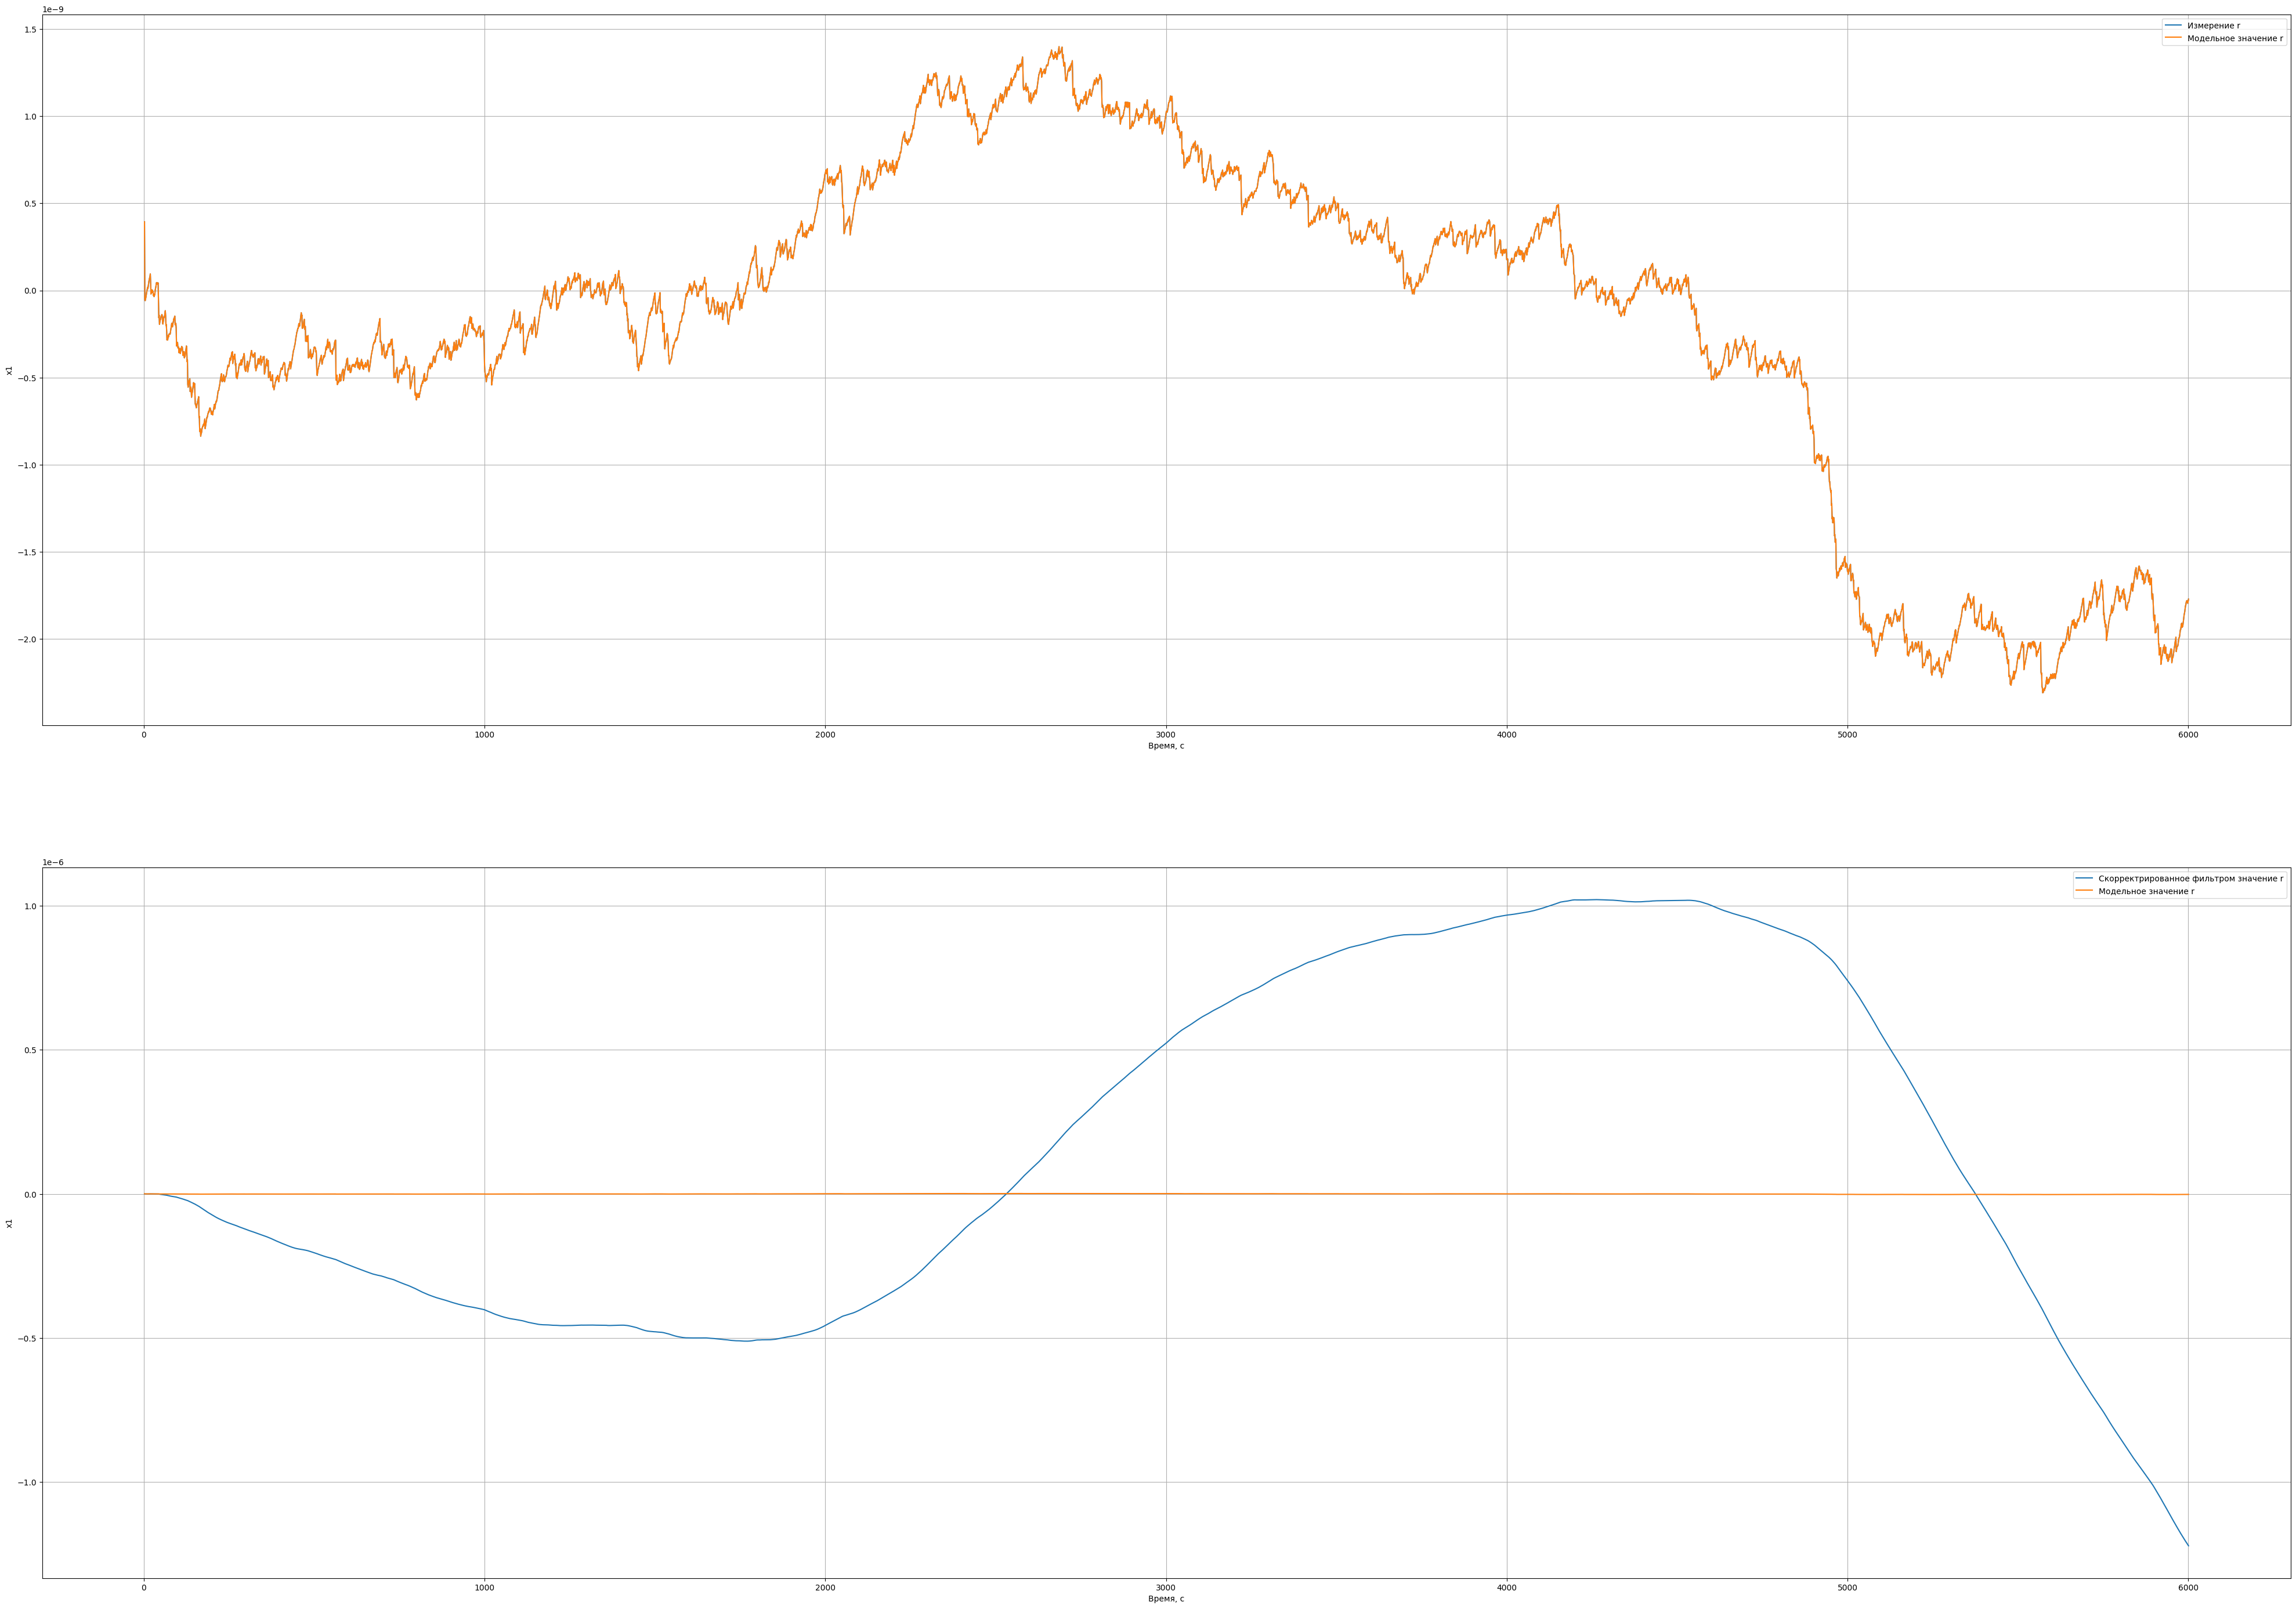

In [55]:

fig = plt.figure(figsize=(50, 35))

ax = fig.add_subplot(2, 1, 1)
ax.plot(data[0, :], z_plot, label='Измерение r')
ax.plot(data[0, :], x_plot2[:, 0], label='Модельное значение r')
plt.legend(fontsize=34)
ax.grid()
ax.legend()
ax.set_xlabel('Время, с')
ax.set_ylabel('x1')

ax = fig.add_subplot(2, 1, 2)
ax.plot(data[0, :], x_plot1[:, 0], label='Скорректрированное фильтром значение r')
ax.plot(data[0, :], x_plot2[:, 0], label='Модельное значение r')
ax.set_xlabel('Время, с')
ax.set_ylabel('x1')
ax.grid()
ax.legend()


plt.show()

In [52]:
import plotly.express as px
import plotly.graph_objs as go

fig_app = go.Figure()
fig_app.add_trace(go.Scatter(x=data[0, :], y=x_plot2[:, 0], name='Измерение'))
fig_app.add_trace(go.Scatter(x=data[0, :], y=z_plot, name='Модель измерения'))

fig_app.update_layout(legend_orientation="v",
                      legend=dict(x=0.9, xanchor="right", y=0.9, yanchor='top',
                        font=dict(size=13)),
                      title=f'$График$',
                      xaxis_title='$Время, отсчеты$',
                      yaxis_title="$Величина$",
                      margin=dict(l=0, r=0, t=30, b=0))
fig_app.show()
